<a href="https://colab.research.google.com/github/nooraovo/nooraovo.github.io/blob/main/testmultineuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
import torch
import time
import numpy as np
import matplotlib.pyplot as plt

##使用pytorch实现之前使用numpy实现的两层神经网络

device=torch.device("cpu")
#选择是使用cpu进行计算还是gpu
#device=torch.device("cuda")

#神经网络参数定义：
N,D_in,D_out,H=100,10,1,2
# N：代表64个人
# D_in:代表每个人输入到神经网络1000个数据点
# D_out:代表每个人从神经网络输出10个数据点
# H:代表该神经网络含有100个隐藏层

x=torch.randn(N,D_in,device=device)
torch.nn.init.normal_(x, 0, 1)
#定义输入到神经网络之前的数据矩阵，大小为64*1000
#这里需要注意的是我们需要指定device为我们刚刚设定好的device
v=torch.rand(D_in,1,device=device)
v=v/v.norm()
y=x.mm(v)
y=y.clamp(min=0)
#y=torch.randn(N,D_out,device=device)
#定义从神经网络输出的的数据矩阵，大小为64*10
w_1=torch.randn(D_in,H,device=device)
torch.nn.init.normal_(w_1, 0, 0.1)
#大小为1000*100
w_2=torch.ones(H,D_out,device=device)
#大小为100*10

In [188]:
learning_rate=0.0005
hidden=[1,2,5,10]
loss_data=np.zeros((4,500))
for i in range(4):
  H=hidden[i]
  w_1=torch.randn(D_in,H,device=device)
  torch.nn.init.normal_(w_1, 0, 0.1)
  #大小为1000*100
  w_2=torch.ones(H,D_out,device=device)
  for it in range(500):
      #forword pass
      h=x.mm(w_1)
      #numpy中的点乘np.dot是数学意义上的向量内积
      #print(h.shape)
      #打印矩阵维度信息
      h_relu=h.clamp(min=0)
      #定义relu 函数，在pytorch中使用.clamp方法
      y_hat=h_relu.mm(w_2)
      #大小为64*10

      #计算损失compute loss
      loss=(y_hat-y).pow(2).sum()/N/2
      #估计值与真实值之间差值的平方和再取和,替换numpy的square方法
      print(it,loss)
      loss_data[i][it]=loss.item()
      print(loss_data[i][it])

      #计算梯度，主要是对(y_hat-y)^2求各项偏导
      y_hat_grad=2*(y_hat-y)
      w_2_grad=h_relu.t().mm(y_hat_grad)
      h_relu_grad=y_hat_grad.mm(w_2.t())
      h_grad=h_relu_grad.clone()
      h_grad[h<0]=0
      w_1_grad=x.t().mm(h_grad)

      #更新w_1和w_2的权值
      w_1=w_1-learning_rate*w_1_grad
      #w_2=w_2-learning_rate*w_2_grad

0 tensor(0.3159)
0.3158941864967346
1 tensor(0.3095)
0.3094669282436371
2 tensor(0.3039)
0.3039480447769165
3 tensor(0.2989)
0.29888853430747986
4 tensor(0.2943)
0.2942894995212555
5 tensor(0.2899)
0.28993481397628784
6 tensor(0.2856)
0.2855827510356903
7 tensor(0.2817)
0.28171008825302124
8 tensor(0.2782)
0.27819573879241943
9 tensor(0.2751)
0.27508285641670227
10 tensor(0.2722)
0.2721739113330841
11 tensor(0.2694)
0.26940229535102844
12 tensor(0.2669)
0.2669358551502228
13 tensor(0.2647)
0.26466405391693115
14 tensor(0.2614)
0.2613973617553711
15 tensor(0.2581)
0.25807473063468933
16 tensor(0.2526)
0.25259479880332947
17 tensor(0.2465)
0.24653327465057373
18 tensor(0.2360)
0.23598426580429077
19 tensor(0.2256)
0.22558289766311646
20 tensor(0.2146)
0.21460886299610138
21 tensor(0.2040)
0.20401506125926971
22 tensor(0.1928)
0.19278381764888763
23 tensor(0.1791)
0.1791134625673294
24 tensor(0.1630)
0.1629512459039688
25 tensor(0.1481)
0.14809824526309967
26 tensor(0.1348)
0.134809151291

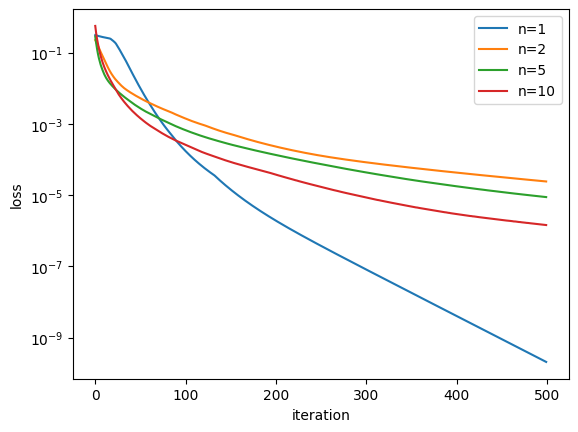

In [189]:
fig,ax = plt.subplots()
plt.yscale('log')
ax.plot(loss_data[0],label='n=1')
ax.plot(loss_data[1],label='n=2')
ax.plot(loss_data[2],label='n=5')
ax.plot(loss_data[3],label='n=10')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.legend()
plt.show()

In [190]:
# layer Normalization
learning_rate=0.0005
hidden=[1,2,5,10]
eps=1e-6
loss_data2=np.zeros((4,500))
for i in range(4):
  H=hidden[i]
  w_1=torch.randn(D_in,H,device=device)
  torch.nn.init.normal_(w_1, 0, 0.1)
  #大小为1000*100
  w_2=torch.ones(H,D_out,device=device)
  for it in range(500):
      #forword pass
      h=x.mm(w_1)
      #numpy中的点乘np.dot是数学意义上的向量内积
      #print(h.shape)
      #打印矩阵维度信息
      mean=h.mean(dim=1,keepdim=True)
      var=h.var(dim=1,keepdim=True)
      h = (h - mean)/(torch.sqrt(var))

      h_relu=h.clamp(min=0)
      #定义relu 函数，在pytorch中使用.clamp方法
      y_hat=h_relu.mm(w_2)
      #大小为64*10

      #计算损失compute loss
      loss=(y_hat-y).pow(2).sum()/N/2
      #估计值与真实值之间差值的平方和再取和,替换numpy的square方法
      print(it,loss)
      loss_data2[i][it]=loss.item()

      #计算梯度，主要是对(y_hat-y)^2求各项偏导
      y_hat_grad=2*(y_hat-y)
      w_2_grad=h_relu.t().mm(y_hat_grad)
      h_relu_grad=y_hat_grad.mm(w_2.t())
      h_grad=h_relu_grad.clone()
      h_grad[h<0]=0
      w_1_grad=x.t().mm(h_grad)

      #更新w_1和w_2的权值
      w_1=w_1-learning_rate*w_1_grad
      #w_2=w_2-learning_rate*w_2_grad

0 tensor(nan)
1 tensor(nan)
2 tensor(nan)
3 tensor(nan)
4 tensor(nan)
5 tensor(nan)
6 tensor(nan)
7 tensor(nan)
8 tensor(nan)
9 tensor(nan)
10 tensor(nan)
11 tensor(nan)
12 tensor(nan)
13 tensor(nan)
14 tensor(nan)
15 tensor(nan)
16 tensor(nan)
17 tensor(nan)
18 tensor(nan)
19 tensor(nan)
20 tensor(nan)
21 tensor(nan)
22 tensor(nan)
23 tensor(nan)
24 tensor(nan)
25 tensor(nan)
26 tensor(nan)
27 tensor(nan)
28 tensor(nan)
29 tensor(nan)
30 tensor(nan)
31 tensor(nan)
32 tensor(nan)
33 tensor(nan)
34 tensor(nan)
35 tensor(nan)
36 tensor(nan)
37 tensor(nan)
38 tensor(nan)
39 tensor(nan)
40 tensor(nan)
41 tensor(nan)
42 tensor(nan)
43 tensor(nan)
44 tensor(nan)
45 tensor(nan)
46 tensor(nan)
47 tensor(nan)
48 tensor(nan)
49 tensor(nan)
50 tensor(nan)
51 tensor(nan)
52 tensor(nan)
53 tensor(nan)
54 tensor(nan)
55 tensor(nan)
56 tensor(nan)
57 tensor(nan)
58 tensor(nan)
59 tensor(nan)
60 tensor(nan)
61 tensor(nan)
62 tensor(nan)
63 tensor(nan)
64 tensor(nan)
65 tensor(nan)
66 tensor(nan)
67 te

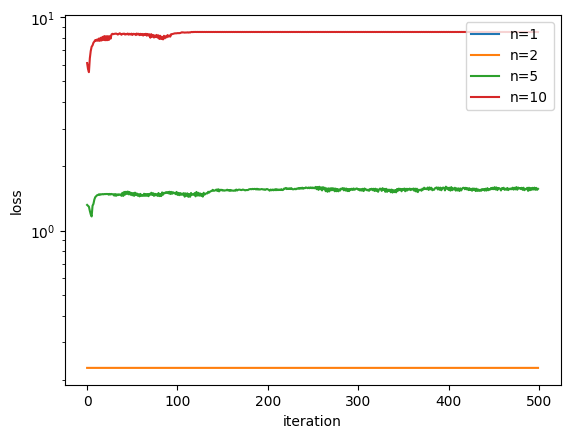

In [191]:
fig,ax = plt.subplots()
plt.yscale('log')
ax.plot(loss_data2[0],label='n=1')
ax.plot(loss_data2[1],label='n=2')
ax.plot(loss_data2[2],label='n=5')
ax.plot(loss_data2[3],label='n=10')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.legend()
plt.show()

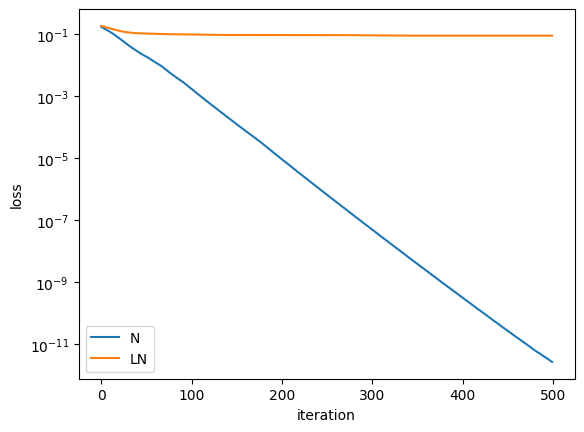

In [152]:
fig,ax = plt.subplots()
plt.yscale('log')
ax.plot(loss_data[0],label='N')
ax.plot(loss_data2[0],label='LN')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.legend()
plt.show()

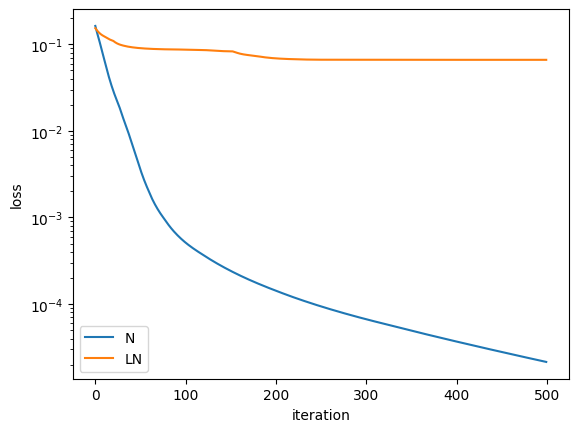

In [153]:
fig,ax = plt.subplots()
plt.yscale('log')
ax.plot(loss_data[1],label='N')
ax.plot(loss_data2[1],label='LN')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.legend()
plt.show()

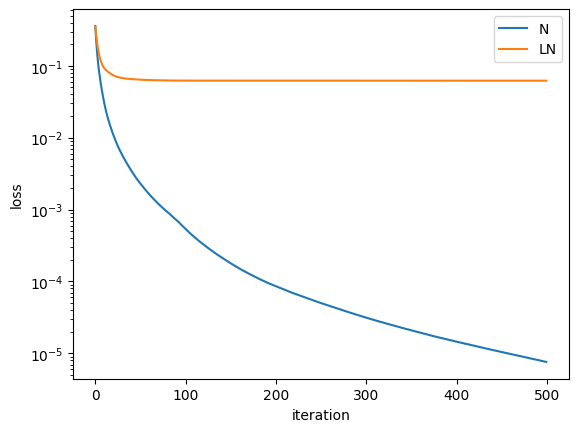

In [154]:
fig,ax = plt.subplots()
plt.yscale('log')
ax.plot(loss_data[2],label='N')
ax.plot(loss_data2[2],label='LN')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.legend()
plt.show()

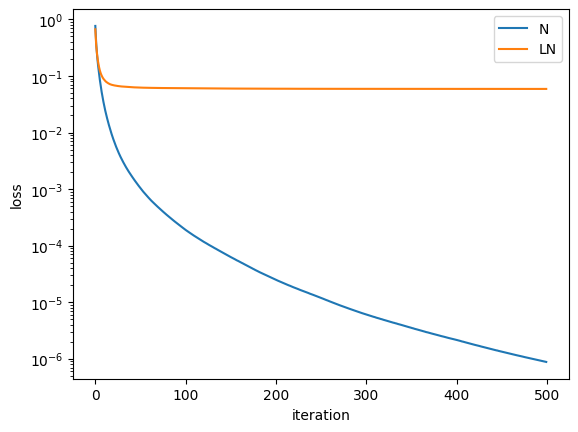

In [155]:
fig,ax = plt.subplots()
plt.yscale('log')
ax.plot(loss_data[3],label='N')
ax.plot(loss_data2[3],label='LN')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.legend()
plt.show()